## Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
% matplotlib inline

## Background
Movie ratings have always been a major deciding factor on whether we watch a movie or not. IMDb and Rotten Tomatoes are two big names in the movie ratings domain. With this project, I have tried to analyse how the ratings between the two compares during the time period from 1970 to 2017.

## Table of Content

1. [Reading and Cleaning Data](#Read-and-Clean-Data)<br>
    1.1 [Read Data](#Read-Data)<br>
    1.2 [Format Data](#Drop-Columns)<br>
    1.3 [Clean Data](#Remove-Duplicates)<br>
2. [IMDb vs Rotten Tomatoes](#Analysis-1:-Comparison-Between-Scores-from-Rotten-Tomatoes-and-IMDb-Over-Time.)<br>
    2.1 [Box Plot for IMDb Scores Over Time](#Box-Plot-for-IMDb-Scores-Over-Time)<br>
    2.2 [Box Plot for Rotten Tomatoes Scores Over Time](#Box-Plot-for-Rotten-Tomatoes-Scores-Over-Time)<br>
    2.3 [Line Graph for Mean Score Comparison Over Time](#IMDb-and-Rotten-Tomatoes-Mean-Scores-Comparison)<br>
    2.4 [Line Graph for Maximum and Minimum Scores Comparison](#Maximum/Minimum-Score-Comparisons)<br>
    2.5 [CountPlot For Scorers' for Different Rotten Tomatoes Scores Groups](#Scorers'-for-Different-Rotten-Tomatoes-Scores-Groups)<br>
3. [Highest Gross Earning Genre(s) vs Highest Rated Genre(s)](#Analysis-2:-Do-Movies-with-Maximum-Score-Earn-the-Most?)<br>
    3.1 [Composition of top 10 most rated genre(s) over the years](#Composition-of-Top-10-Most-Rated-Genre-Over-The-Years)<br>
    3.2 [Top Grossing Genre(s) in Past Decade](#Top-Grossing-Genre-in-Past-10-Years)<br>
    3.3 [Top Rotten Tomatoes Rated Genre(s) in Past Decade](#Top-Rotten-Tomatoes-Rated-Genre-in-Past-Decade)<br>
    3.4 [Top IMDb Rated Genre(s) in Past Decade](#Top-IMDb-Rated-Genre-in-Past-Decade)<br>

## Read and Clean Data

In [2]:
df_ratings = pd.read_csv('RT_vs_IMDb3.csv')

In [3]:
df_ratings.head(2)

,@,Difference,Avg0,Icon,Fresh,MaxScore,FilmName+Year,Size,Certified Fresh,Check Netflix,...,Movie Name,Number of Records,Rt Url,Time Period,Release Year,Search Tastedive,score,scorer,X',Y'
0,0.785398,100,0,AUDIENCE FRESH,60,100,'Round Midnight (1986),1,0,https://www.netflix.com/search?q='Round%20Midn...,...,'Round Midnight,1,https://www.rottentomatoes.com/m/round_midnight,1985,1986,https://tastedive.com/movies/like/'Round-Midnight,89,audience,-7.778175,133.643182
1,0.785398,100,0,CRITIC FRESH,60,100,'Round Midnight (1986),1,0,https://www.netflix.com/search?q='Round%20Midn...,...,'Round Midnight,1,https://www.rottentomatoes.com/m/round_midnight,1985,1986,https://tastedive.com/movies/like/'Round-Midnight,100,critic,-7.778175,133.643182


## Drop Columns

In [4]:
df_ratings.columns = map(str.lower, df_ratings)

In [5]:
df_ratings.drop(columns=['@', 'difference', 'avg0', 'fresh', 'size', 'number of records', 'check netflix','check prime',
                         'concat recommendedfilm', 'film description', 'fulldescription', 'imdb url', 'rt url',
                         'search tastedive', 'x\'', 'y\'', 'filmname+year'], inplace=True)

## Remove Duplicates

In [6]:
df_ratings.drop_duplicates(inplace=True)

In [7]:
df_ratings.head(2)

,icon,maxscore,certified fresh,fresh/rotten,genre(s),imdb score,likes,movie id,movie name,time period,release year,score,scorer
0,AUDIENCE FRESH,100,0,fresh,"Drama,Music",74,NaN,1,'Round Midnight,1985,1986,89,audience
1,CRITIC FRESH,100,0,fresh,"Drama,Music",74,NaN,1,'Round Midnight,1985,1986,100,critic


# Analysis

## Analysis 1: Comparison Between Scores from Rotten Tomatoes and IMDb Over Time.

#### Box Plot for IMDb Scores Over Time

In [8]:
init_notebook_mode(connected=True)
Imdb_scores = go.Box(x=df_ratings['time period'], y=df_ratings['imdb score'], name='IMDB_score')
layout1 = go.Layout(
        title='<b>IMDB Scores Distribution Over The Years</b>', 
               titlefont=dict(family='Arial', size=40, color='#00008B'),
        xaxis=dict(title='<b>Time Period(Years)</b>', titlefont=dict(size=35, color='#00008B'), showticklabels=True,
                   tickfont=dict(size=30, color='#00008B')),
        yaxis=dict(title='<b>Scores</b>', titlefont=dict(size=35, color='#00008B'), showticklabels=True,
                 tickfont=dict(size=30, color='#00008B')),
        margin=dict(autoexpand=False, l=100, r=30, t=100))
fig1 = go.Figure(data=[Imdb_scores], layout=layout1)
plotly.offline.iplot(fig1)

#### Box Plot for Rotten Tomatoes Scores Over Time

In [9]:
init_notebook_mode(connected=True)
RT_scores = go.Box(x=df_ratings['time period'], y=df_ratings['score'], name='IMDB_score', 
                   marker=dict(color='rgb(0, 128, 128)'))
layout1 = go.Layout(
        title='<b>Rotten Tomatoes Scores Distribution Over The Years</b>', 
               titlefont=dict(family='Arial', size=38, color='#00008B'),
        xaxis=dict(title='<b>Time Period(Years)</b>', titlefont=dict(size=35, color='#00008B'), showticklabels=True,
                   tickfont=dict(size=30, color='#00008B')),
        yaxis=dict(title='<b>Scores</b>', titlefont=dict(size=35, color='#00008B'), showticklabels=True,
                 tickfont=dict(size=30, color='#00008B')),
        margin=dict(autoexpand=False, l=100, r=30, t=100))
fig1 = go.Figure(data=[RT_scores], layout=layout1)
plotly.offline.iplot(fig1)

From the Box plots, we could see that <b>IMDb</b> scores are pretty neatly spread between <b>60-70</b> for most years but the range for <b>Rotten Tomatoes</b> is much wider, from around <b>40-80</b> is the average for most years. To view this more clearly, only the mean scores from both IMDb and Rotten Tomatoes for all years is captured.

In [10]:
df_mean_scores = df_ratings.groupby('release year')[['score', 'imdb score']].mean().reset_index()
df_mean_scores['score'] = df_mean_scores['score'].round(2)
df_mean_scores['imdb score'] = df_mean_scores['imdb score'].round(2)

#### IMDb and Rotten Tomatoes Mean Scores Comparison

In [11]:
init_notebook_mode(connected=True)
Imdb_mean_scores = go.Scatter(x=df_mean_scores['release year'], y=df_mean_scores['imdb score'], line=dict(width=4), 
                    text=df_mean_scores['imdb score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                             name='IMDB_mean_score')
RT_mean_scores = go.Scatter(x=df_mean_scores['release year'], y=df_mean_scores['score'], line=dict(width=4), 
                    text=df_mean_scores['score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                           name='RT_mean_score')
layout1 = go.Layout(
        title='<b>Comparison of IMDB and Rotten Tomatoes Mean Scores Over Time</b>', 
               titlefont=dict(family='Arial', size=30, color='#00008B'),
        xaxis=dict(title='<b>Release Years</b>', titlefont=dict(size=25, color='#00008B'), showticklabels=True,
                   tickfont=dict(size=20, color='#00008B')),
        yaxis=dict(title='<b>Mean Scores</b>', titlefont=dict(size=25, color='#00008B'), showticklabels=True,
                 tickfont=dict(size=20, color='#00008B')), plot_bgcolor='black',
    legend=dict(x=.1, y=.1, font=dict(family='sans-serif', size=25)),
        margin=dict(autoexpand=False, l=100, r=30, t=100))
fig1 = go.Figure(data=[Imdb_mean_scores, RT_mean_scores], layout=layout1)
plotly.offline.iplot(fig1)

Mean scores from rotten tomatoes is less than the mean scores from imdb per year for almost all of the years. Was it possible that the rotten tomatoes maximum score is also lesser than the maximum scores from imdb? The next part analyzes the two ratings mechanisms' maximum and minimum scores. 

In [12]:
df_max_scores = df_ratings.groupby('release year')[['imdb score', 'score']].max().reset_index()
df_min_scores = df_ratings.groupby('release year')[['imdb score', 'score']].min().reset_index()

#### Maximum/Minimum Score Comparisons

In [13]:
trace0 = go.Scatter(x=df_max_scores['release year'], y=df_max_scores['imdb score'], line=dict(width=4, color='#00FFFF'), 
                    text=df_max_scores['imdb score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                             name='IMDB_max_score')
trace1 = go.Scatter(x=df_max_scores['release year'], y=df_max_scores['score'], line=dict(width=4, color='#D0012A'), 
                    text=df_max_scores['score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                           name='RT_max_score')
layout1 = go.Layout(
         title='<b>Comparison of IMDB & RT Maximum Scores Over Time</b>', titlefont=dict(family='Arial', 
                                                                                            size=35, color='#00008B', ),
         xaxis=dict(title='<b>Release Years<b>', titlefont=dict(size=30, color='#00008B'), showticklabels=True, 
                    tickfont=dict(size=30, color='#00008B')),
         yaxis=dict(title='<b>Maximum Scores<b>', titlefont=dict(size=30, color='#00008B'), showticklabels=True,
                 tickfont=dict(size=30, color='#00008B')),
         plot_bgcolor='black',
         legend=dict(orientation="v", x=.7, y=0.1, font=dict(family='sans-serif', size=25)),
         margin=dict(autoexpand=False, l=80, r=30, t=100))
fig1 = go.Figure(data=[trace0, trace1], layout=layout1)
plotly.offline.iplot(fig1)

In [14]:
trace0 = go.Scatter(x=df_min_scores['release year'], y=df_min_scores['imdb score'], line=dict(width=4, color='#00FFFF'), 
                    text=df_min_scores['imdb score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                             name='IMDB_min_score')
trace1 = go.Scatter(x=df_min_scores['release year'], y=df_min_scores['score'], line=dict(width=4, color='#D0012A'), 
                    text=df_min_scores['score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                           name='RT_min_score')
layout1 = go.Layout(
         title='<b>Comparison of IMDB & RT Minimum Scores Over Time</b>', titlefont=dict(family='Arial', 
                                                                                            size=35, color='#00008B', ),
         xaxis=dict(title='<b>Release Years<b>', titlefont=dict(size=30, color='#00008B'), showticklabels=True, 
                    tickfont=dict(size=30, color='#00008B')),
         yaxis=dict(title='<b>Minimum Scores<b>', titlefont=dict(size=30, color='#00008B'), showticklabels=True,
                 tickfont=dict(size=30, color='#00008B')),
         plot_bgcolor='black',
         legend=dict(orientation="v", x=.7, y=0.98, font=dict(family='sans-serif', size=25)),
         margin=dict(autoexpand=False, l=80, r=30, t=100))
fig1 = go.Figure(data=[trace0, trace1], layout=layout1)
plotly.offline.iplot(fig1)

From the above 2 line graphs, Rotten Tomatoes maximums and minimums over the year are more extreme than imdb's maximums and minimums. Is it because critics have the tendency to score 0 or 100 more than the audiences? And also because the critics score is separate in rotten tomatoes than the audience score?

In [15]:
df_ratings.loc[df_ratings['score'] == 0, 'rt_score_group'] = '0'
df_ratings.loc[((df_ratings['score'] > 0) & (df_ratings['score'] <= 25)), 'rt_score_group'] = '1 - 25'
df_ratings.loc[((df_ratings['score'] > 25) & (df_ratings['score'] <= 50)), 'rt_score_group'] = '26 - 50'
df_ratings.loc[((df_ratings['score'] > 50) & (df_ratings['score'] <= 75)), 'rt_score_group'] = '51 - 75'
df_ratings.loc[((df_ratings['score'] > 75) & (df_ratings['score'] <= 99)), 'rt_score_group'] = '76 - 99'
df_ratings.loc[df_ratings['score'] == 100, 'rt_score_group'] = '100'

#### Scorers' for Different Rotten Tomatoes Scores Groups

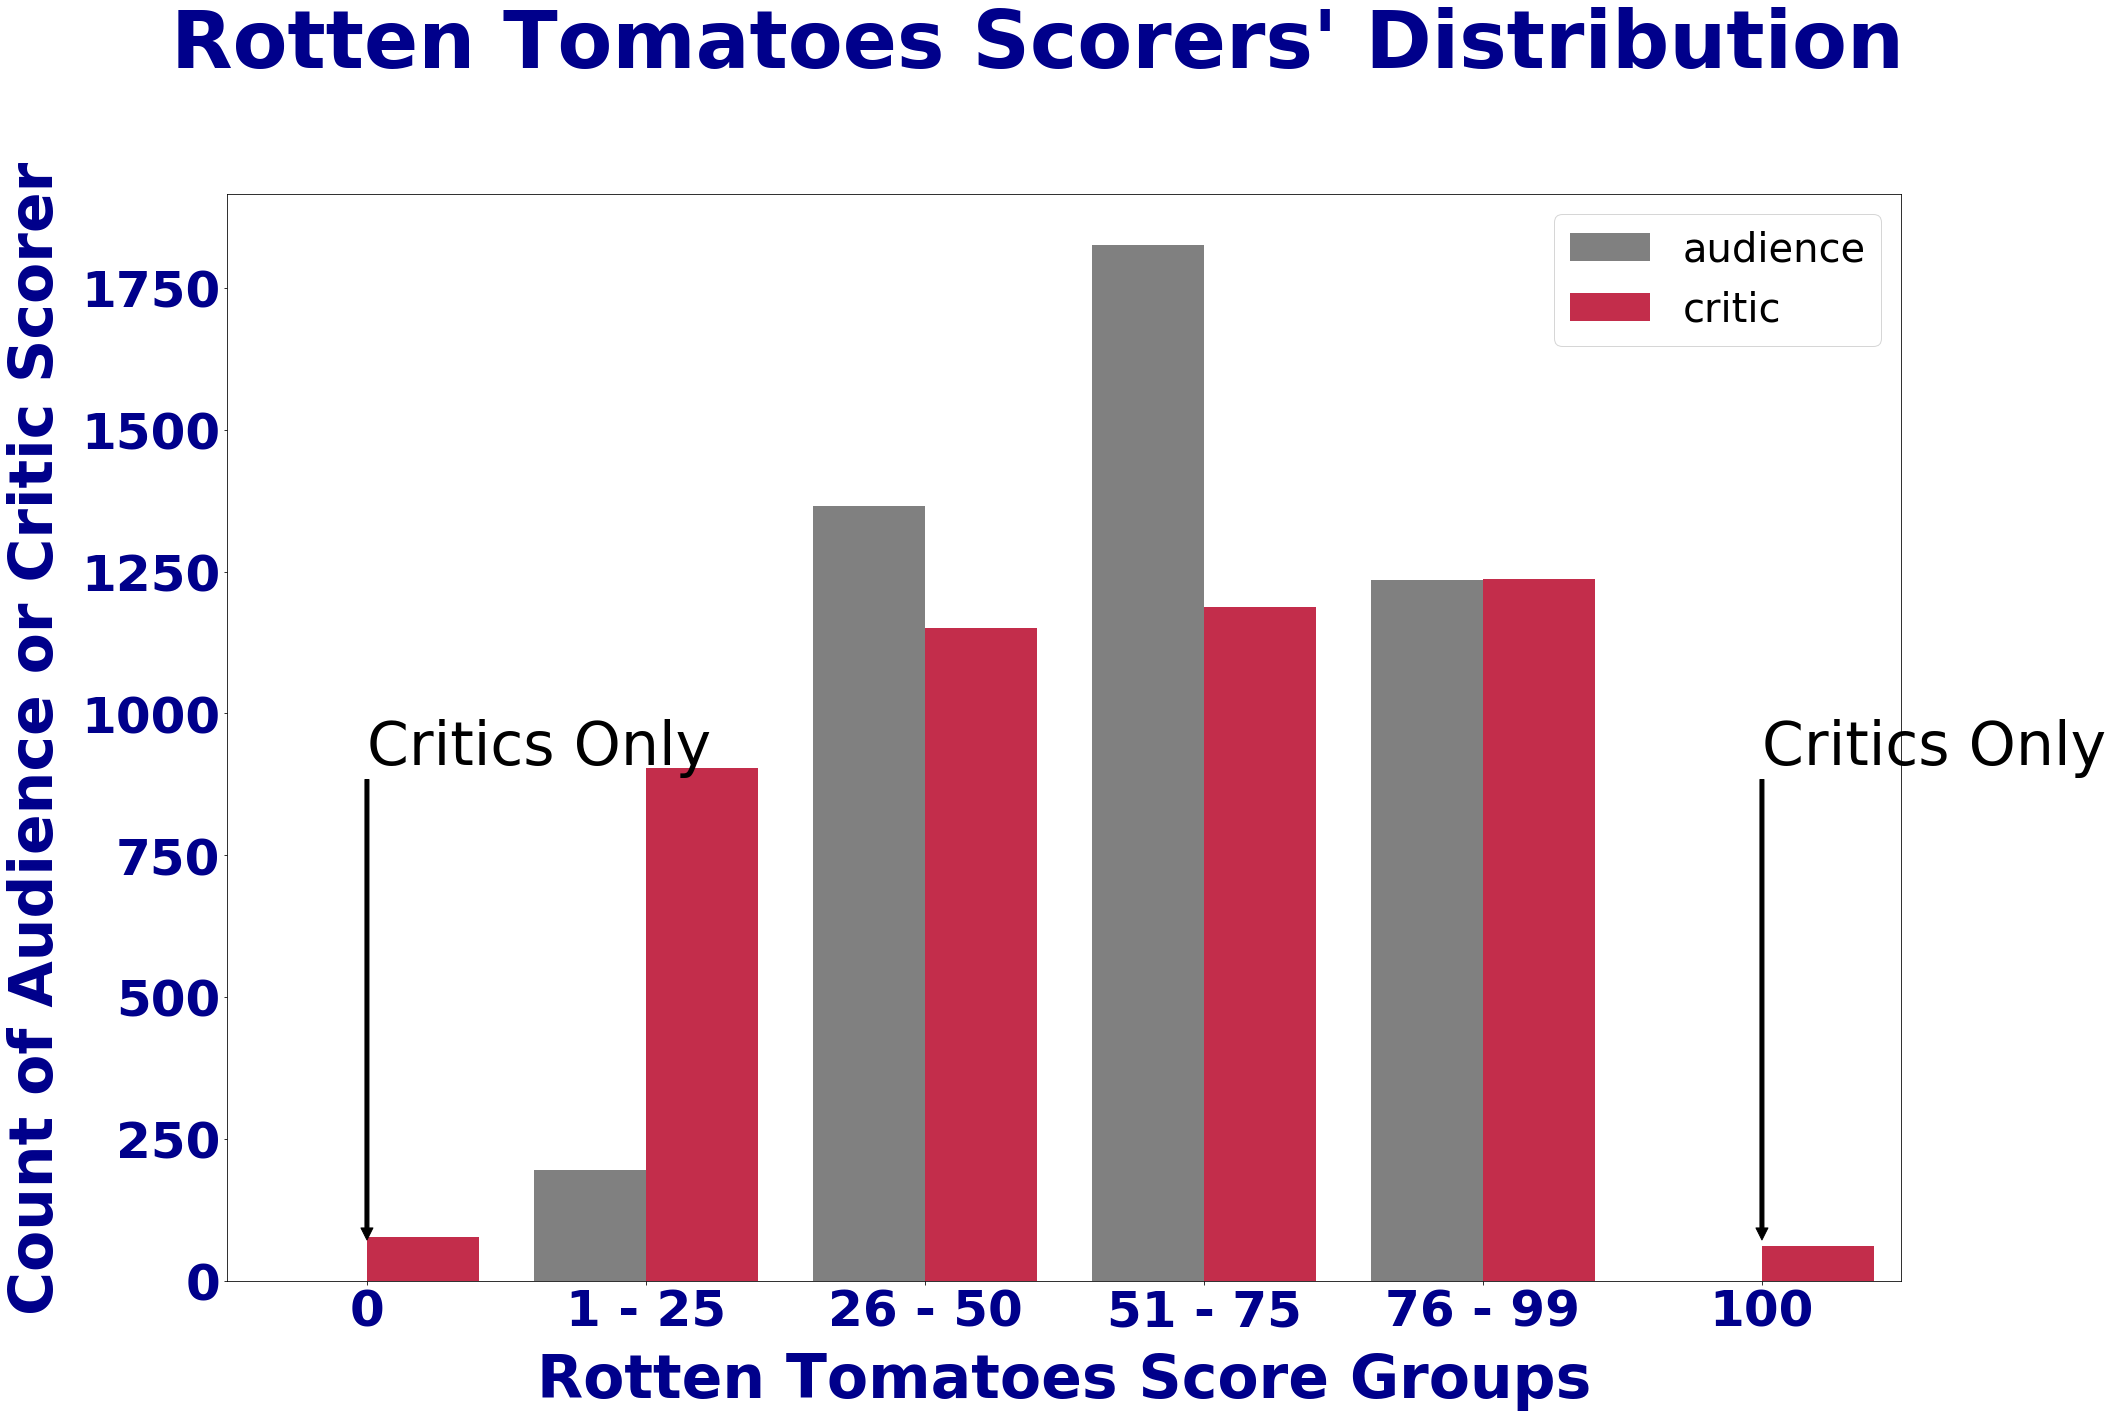

In [16]:
order = ['0','1 - 25','26 - 50','51 - 75','76 - 99', '100']
plt.figure(figsize=(30,20))
sns.countplot(x='rt_score_group', hue='scorer', data=df_ratings, order=order, palette=['gray', 'crimson'])
plt.suptitle("Rotten Tomatoes Scorers' Distribution", y=1.01, fontsize=80, fontweight='bold', color="#00008B")
plt.xlabel("Rotten Tomatoes Score Groups", labelpad=15, fontsize=60, fontweight='bold', color="#00008B")
plt.ylabel("Count of Audience or Critic Scorer", labelpad=15, fontsize=60, fontweight='bold', color="#00008B")
plt.xticks(fontsize=50, fontweight='bold', color="#00008B", rotation='horizontal')
plt.yticks(fontsize=50, fontweight='bold', color="#00008B")
plt.annotate('Critics Only',xy=(0,72), xytext=(0,910), size=60, arrowprops=dict(facecolor='black'))
plt.annotate('Critics Only',xy=(5,72), xytext=(5,910), size=60, arrowprops=dict(facecolor='black'))
plt.legend(fontsize = 40);

### It can be concluded from here that movies with a score of 0 or 100 in the rotten tomatoes are all scored by the critics. <br> From analysis 1, it can also be said that imdb ratings are more of an average ratings for the movies, since the mean score of imdb score only ranges between 68-62. 

## Analysis 2: Do Movies with Maximum Score Earn the Most?

### Composition of Top 10 Most Rated Genre Over The Years

In [17]:
# Dropping the multiple instances of each movie, since we need to find the top genre(s) being rated,
# so having 1 instance of each movie made more sense.
df_distinct_movie = df_ratings.drop_duplicates('movie name')
df_top_10_genre_distinct_movie = df_distinct_movie.groupby('genre(s)')[['icon']].count().sort_values(by='icon',
                                        ascending=False).reset_index().rename(columns={'icon':'count'}).head(10)

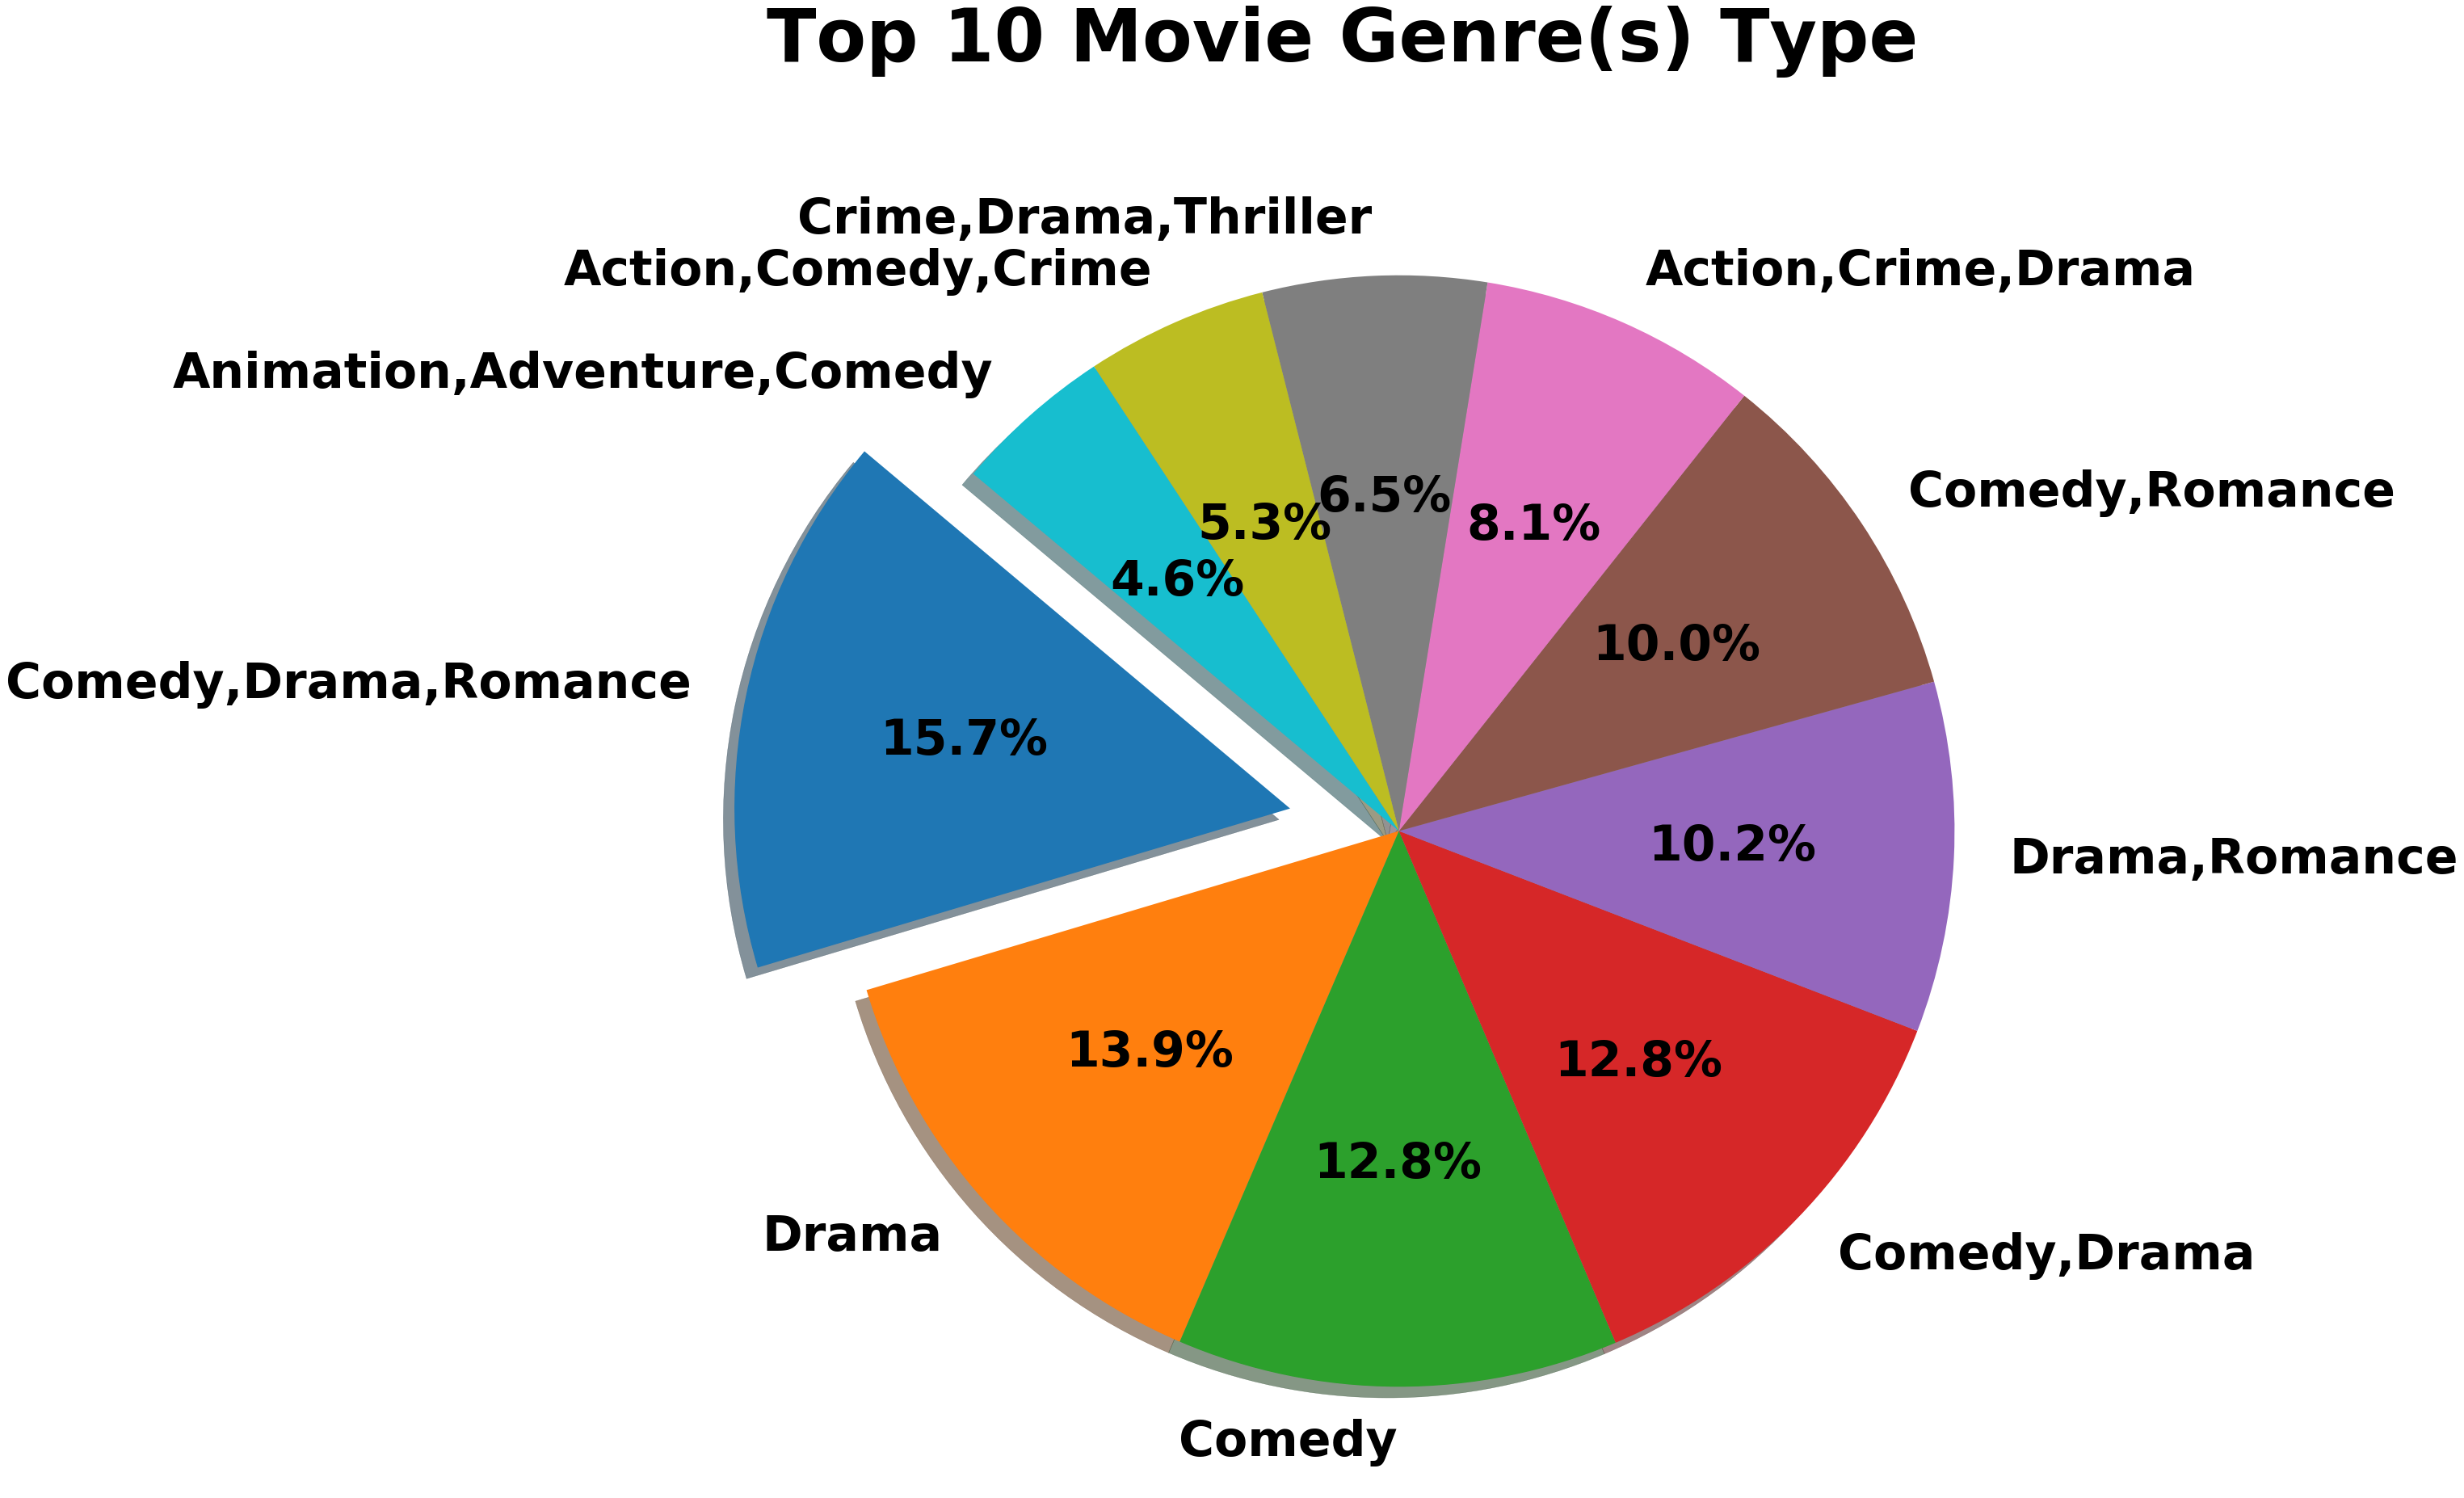

In [18]:
sns.set_context('talk')
plt.figure(figsize=(30,30))
plt.title('Top 10 Movie Genre(s) Type', fontsize=90, fontweight='bold', y=1.08)
labels = df_top_10_genre_distinct_movie['genre(s)']
sizes = df_top_10_genre_distinct_movie['count']
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0) 
plot1 = plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140,
                textprops={'fontsize':60, 'fontweight':'bold'})
plt.axis('equal');

With a total of <b> 403</b> different Genre(s), it would make more sense to only include the Genre(s), that either earned the most or were rated the highest.

In [19]:
top_grossing_movies = {'Title': ['Pirates of the Caribbean: At World\'s End', 'The Dark Knight', 'Avatar', 'Toy Story 3',
                          'Harry Potter and the Deathly Hallows Part 2', 'Marvel\'s The Avengers', 'Frozen',
                          'Transformers: Age of Extinction', 'Star Wars: The Force Awakens', 'Captain America: Civil War',
                          'Star Wars: The Last Jedi'],
            'Worldwide Gross': [963420425, 1004558444, 2787965087, 1066969703, 1341511219, 1518812988, 1290000000, 1104039076, 
                               2068223624, 1153304495, 1332539889],
                  'Release Year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], 
                    'Imdb Score': [71, 90, 78, 83, 81, 81, 75, 57, 80, 78, 72],
                'RT Critic Score': [45, 94 , 83, 99, 81, 92, 90, 18, 93, 91, 91], 
                'RT Audience Score': [72, 94, 82, 89,  89, 91, 85, 51, 87, 89, 46], 
                'Genre(s)': ['Action,Adventure,Fantasy', 'Action,Crime,Drama', 'Action,Adventure,Fantasy', 
                             'Animation,Adventure,Comedy', 'Adventure,Drama,Fantasy', 'Action,Adventure,Sci-Fi', 
                             'Animation,Adventure,Comedy', 'Action,Adventure,Sci-Fi', 'Action,Adventure,Fantasy', 
                             'Action,Adventure,Sci-Fi', 'Action,Adventure,Fantasy']}

In [20]:
df_top_grossing_movies = pd.DataFrame(data=top_grossing_movies).infer_objects()

In [21]:
df_top_grossing_movies.head(1)

,Title,Worldwide Gross,Release Year,Imdb Score,RT Critic Score,RT Audience Score,Genre(s)
0,Pirates of the Caribbean: At World's End,963420425,2007,71,45,72,"Action,Adventure,Fantasy"


### Top Grossing Genre in Past 10 Years

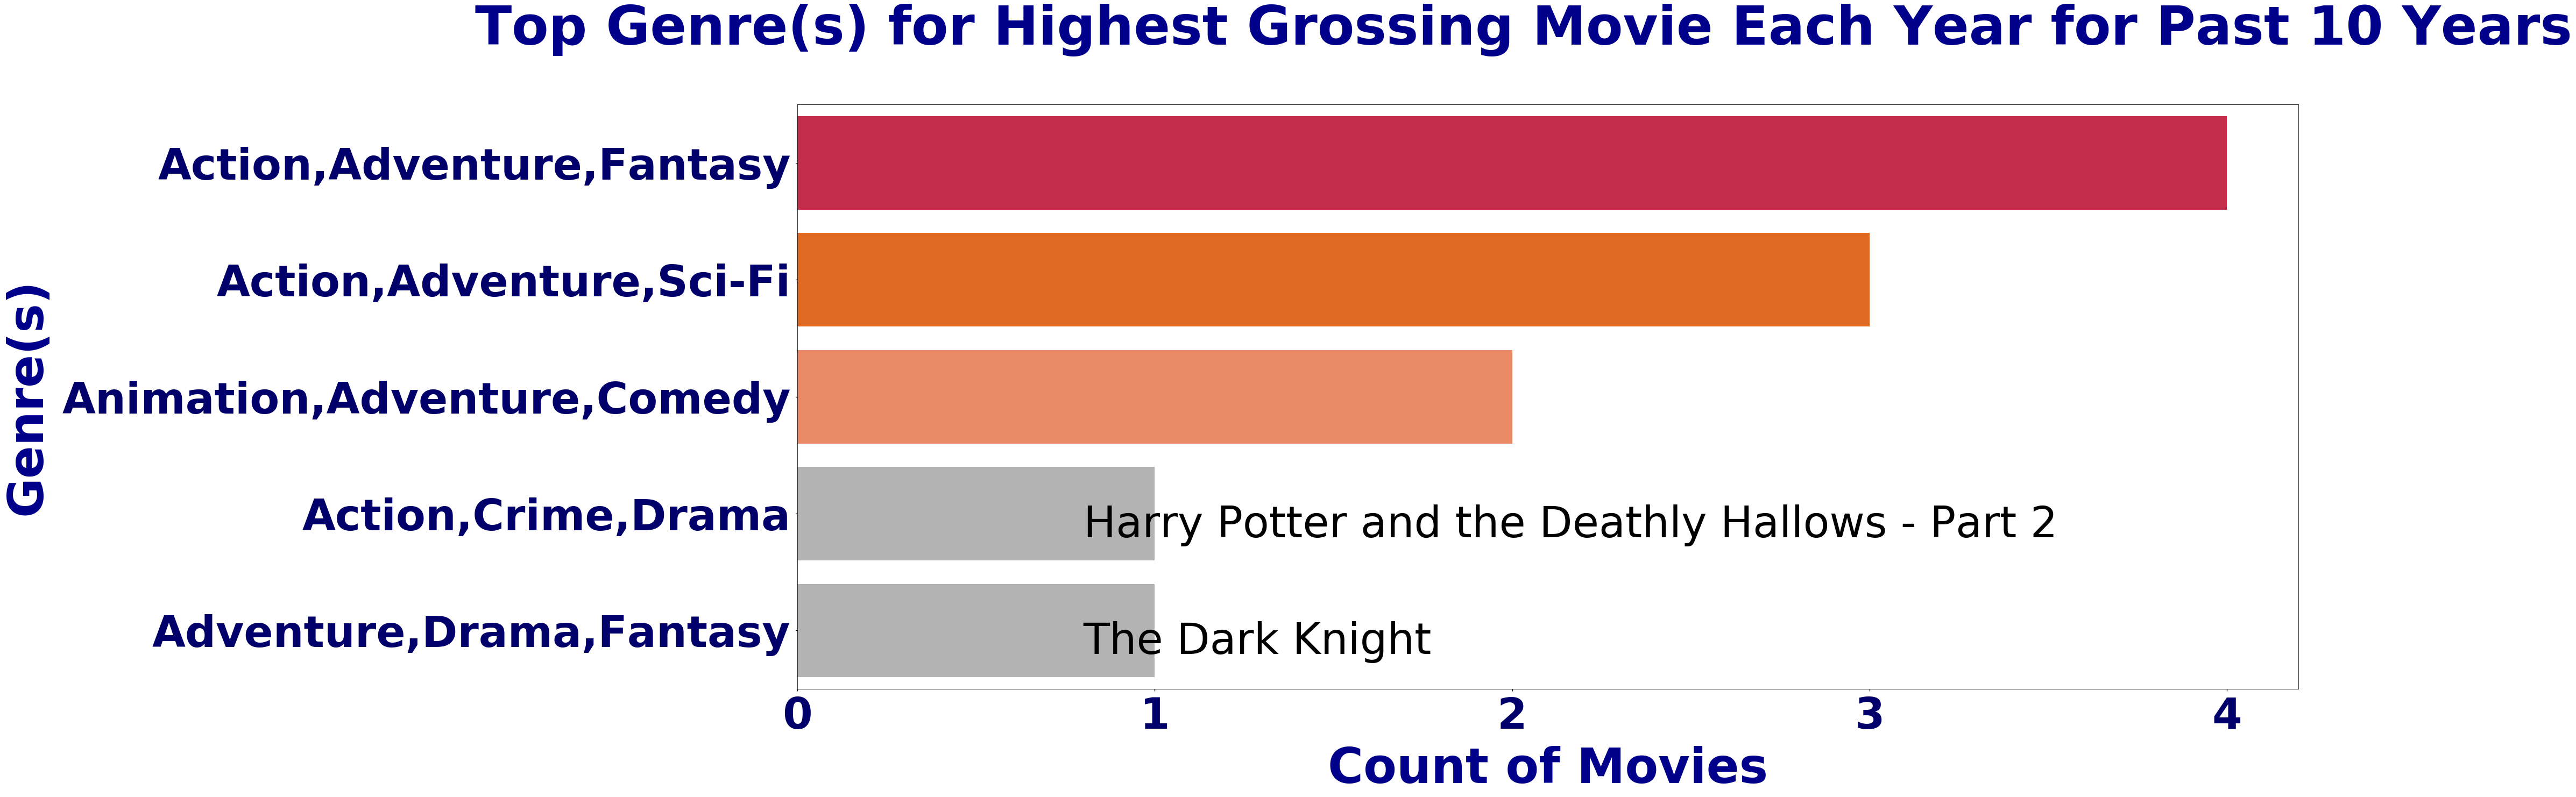

In [29]:
plt.figure(figsize=(50, 20))
xtick = [0,1,2,3,4]
sns.countplot(y='Genre(s)', data=df_top_grossing_movies, orient='h', 
              palette=['crimson','#FF6103','#FF7F50', '#B3B3B3','#B3B3B3'], 
              order=df_top_grossing_movies['Genre(s)'].value_counts().index)
plt.suptitle("Top Genre(s) for Highest Grossing Movie Each Year for Past 10 Years", y=1.01, fontsize=100,
          fontweight='bold', color='#00008B')
plt.xlabel("Count of Movies", labelpad=15, fontsize=90, fontweight='bold', color="#00008B")
plt.ylabel("Genre(s)", labelpad=20, fontsize=90, fontweight='bold', color='#00008B')
plt.xticks(xtick, fontsize=80, fontweight='bold', color='#01006A')
plt.annotate('The Dark Knight',xy=(0,4), xytext=(.8,4.2), size=80)
plt.annotate('Harry Potter and the Deathly Hallows - Part 2',xy=(0,3), xytext=(.8,3.2), size=80)
plt.yticks(fontsize=80, fontweight='bold', color='#01006A');

In [23]:
df_last_10_years = df_ratings[df_ratings['release year'] > 2007]
df_rt_audience = df_last_10_years[df_last_10_years['scorer'] == 'audience']
df_rt_top_score = df_rt_audience.loc[df_rt_audience.groupby('release year')['score'].idxmax()]

### Top Rotten Tomatoes Rated Genre in Past Decade

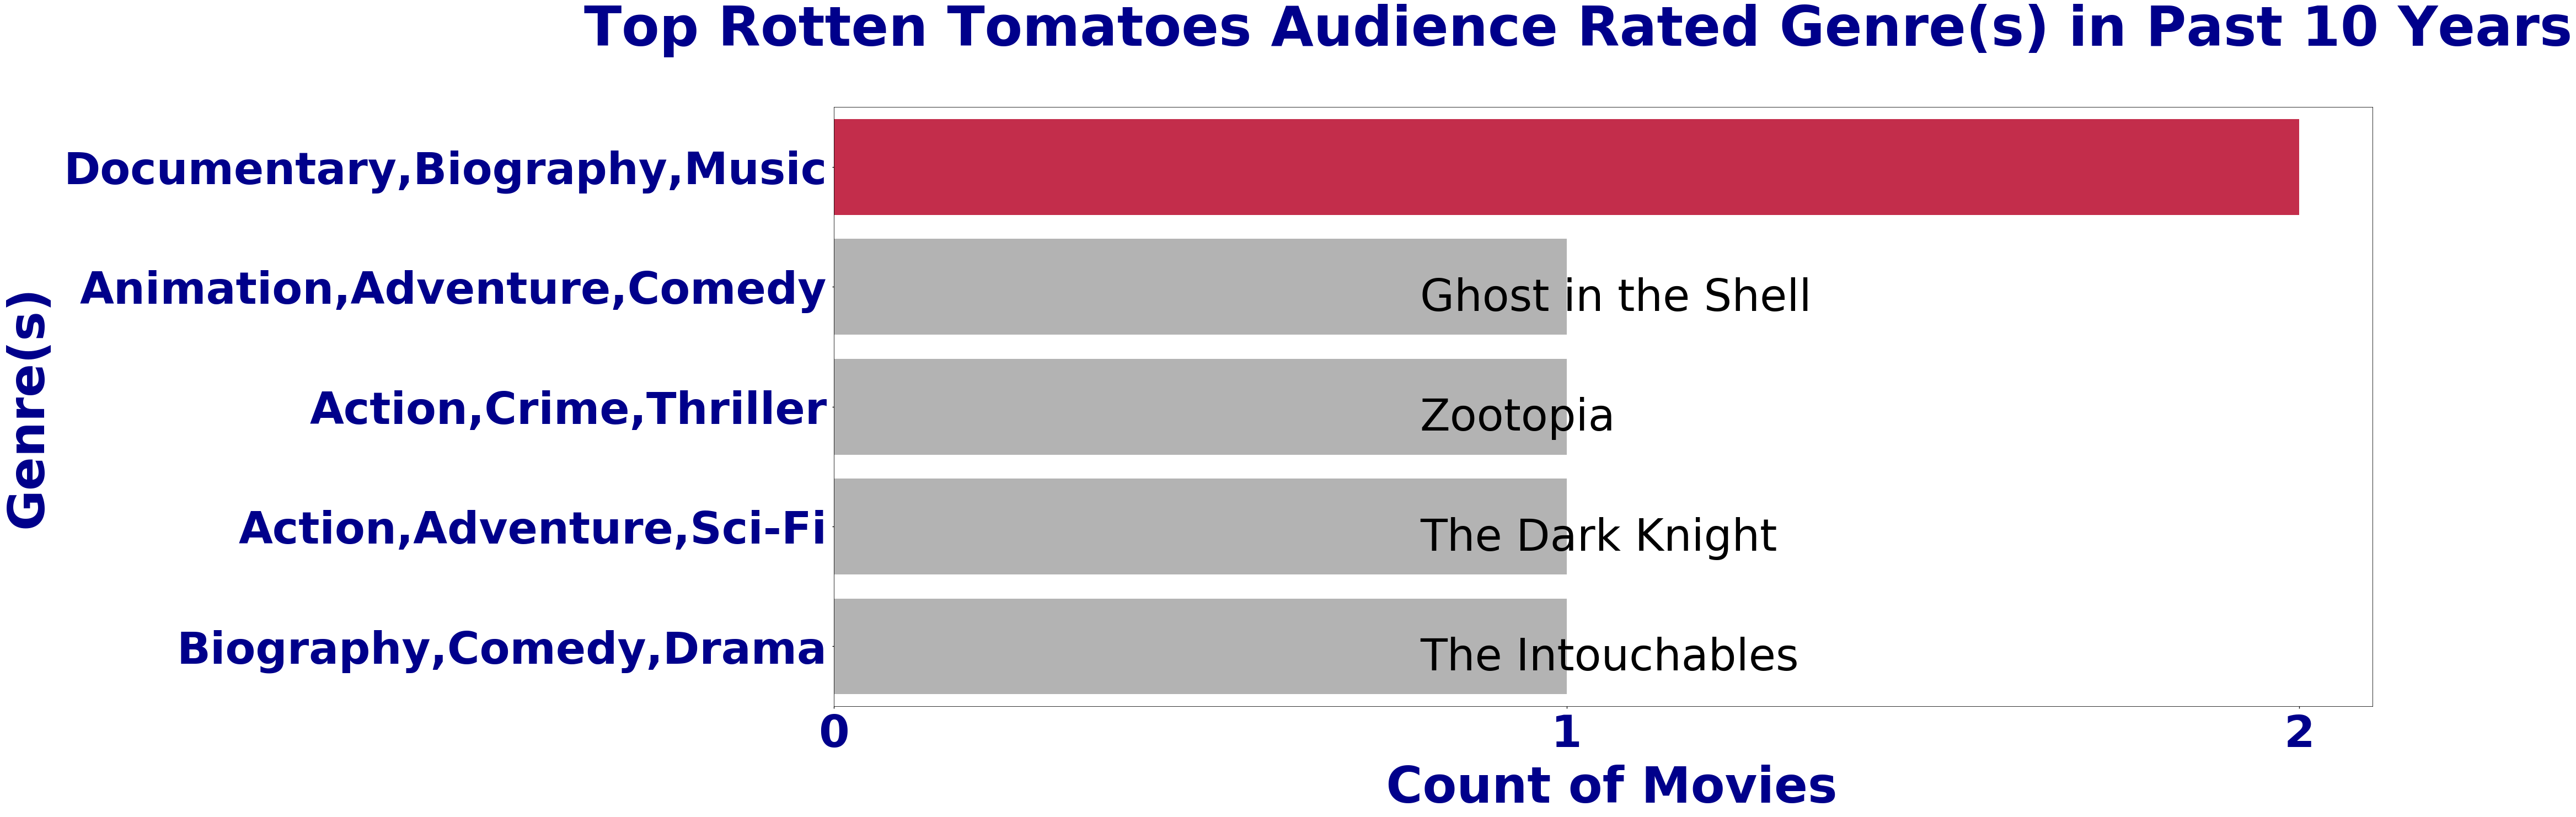

In [25]:
plt.figure(figsize=(50, 20))
xtick = [0,1,2]
sns.countplot(y='genre(s)', data=df_rt_top_score, orient='h',
              order=df_rt_top_score['genre(s)'].value_counts().iloc[:5].index, palette=['crimson','#B3B3B3','#B3B3B3',
                                                                                        '#B3B3B3','#B3B3B3'])
plt.suptitle("Top Rotten Tomatoes Audience Rated Genre(s) in Past 10 Years", y=1.01, fontsize=100, fontweight='bold',
          color="#00008B")
plt.xlabel(" Count of Movies", labelpad=15, fontsize=90, fontweight='bold', color="#00008B")
plt.ylabel("Genre(s)", labelpad=20, fontsize=90, fontweight='bold', color="#00008B")
plt.xticks(xtick, fontsize=80, fontweight='bold', color="#00008B")
plt.yticks(fontsize=80, fontweight='bold', color="#00008B")
plt.annotate('Ghost in the Shell',xy=(0,1), xytext=(.8,1.2), size=80)
plt.annotate('Zootopia',xy=(0,2), xytext=(.8,2.2), size=80)
plt.annotate('The Dark Knight',xy=(0,3), xytext=(.8,3.2), size=80)
plt.annotate('The Intouchables',xy=(0,4), xytext=(.8,4.2), size=80);

The Genre(s) that are most loved by the audience in terms of earnings are not the ones that are rated the highest by the rotten tomatoes critics. Since from the Analysis 1, it was assumed that the imdb rating is closer to how the audience reacted to the movies, the next step was to establish this as the truth than just a myth.

In [26]:
df_top_score = df_last_10_years.loc[df_last_10_years.groupby('release year')['imdb score'].idxmax()]

### Top IMDb Rated Genre in Past Decade

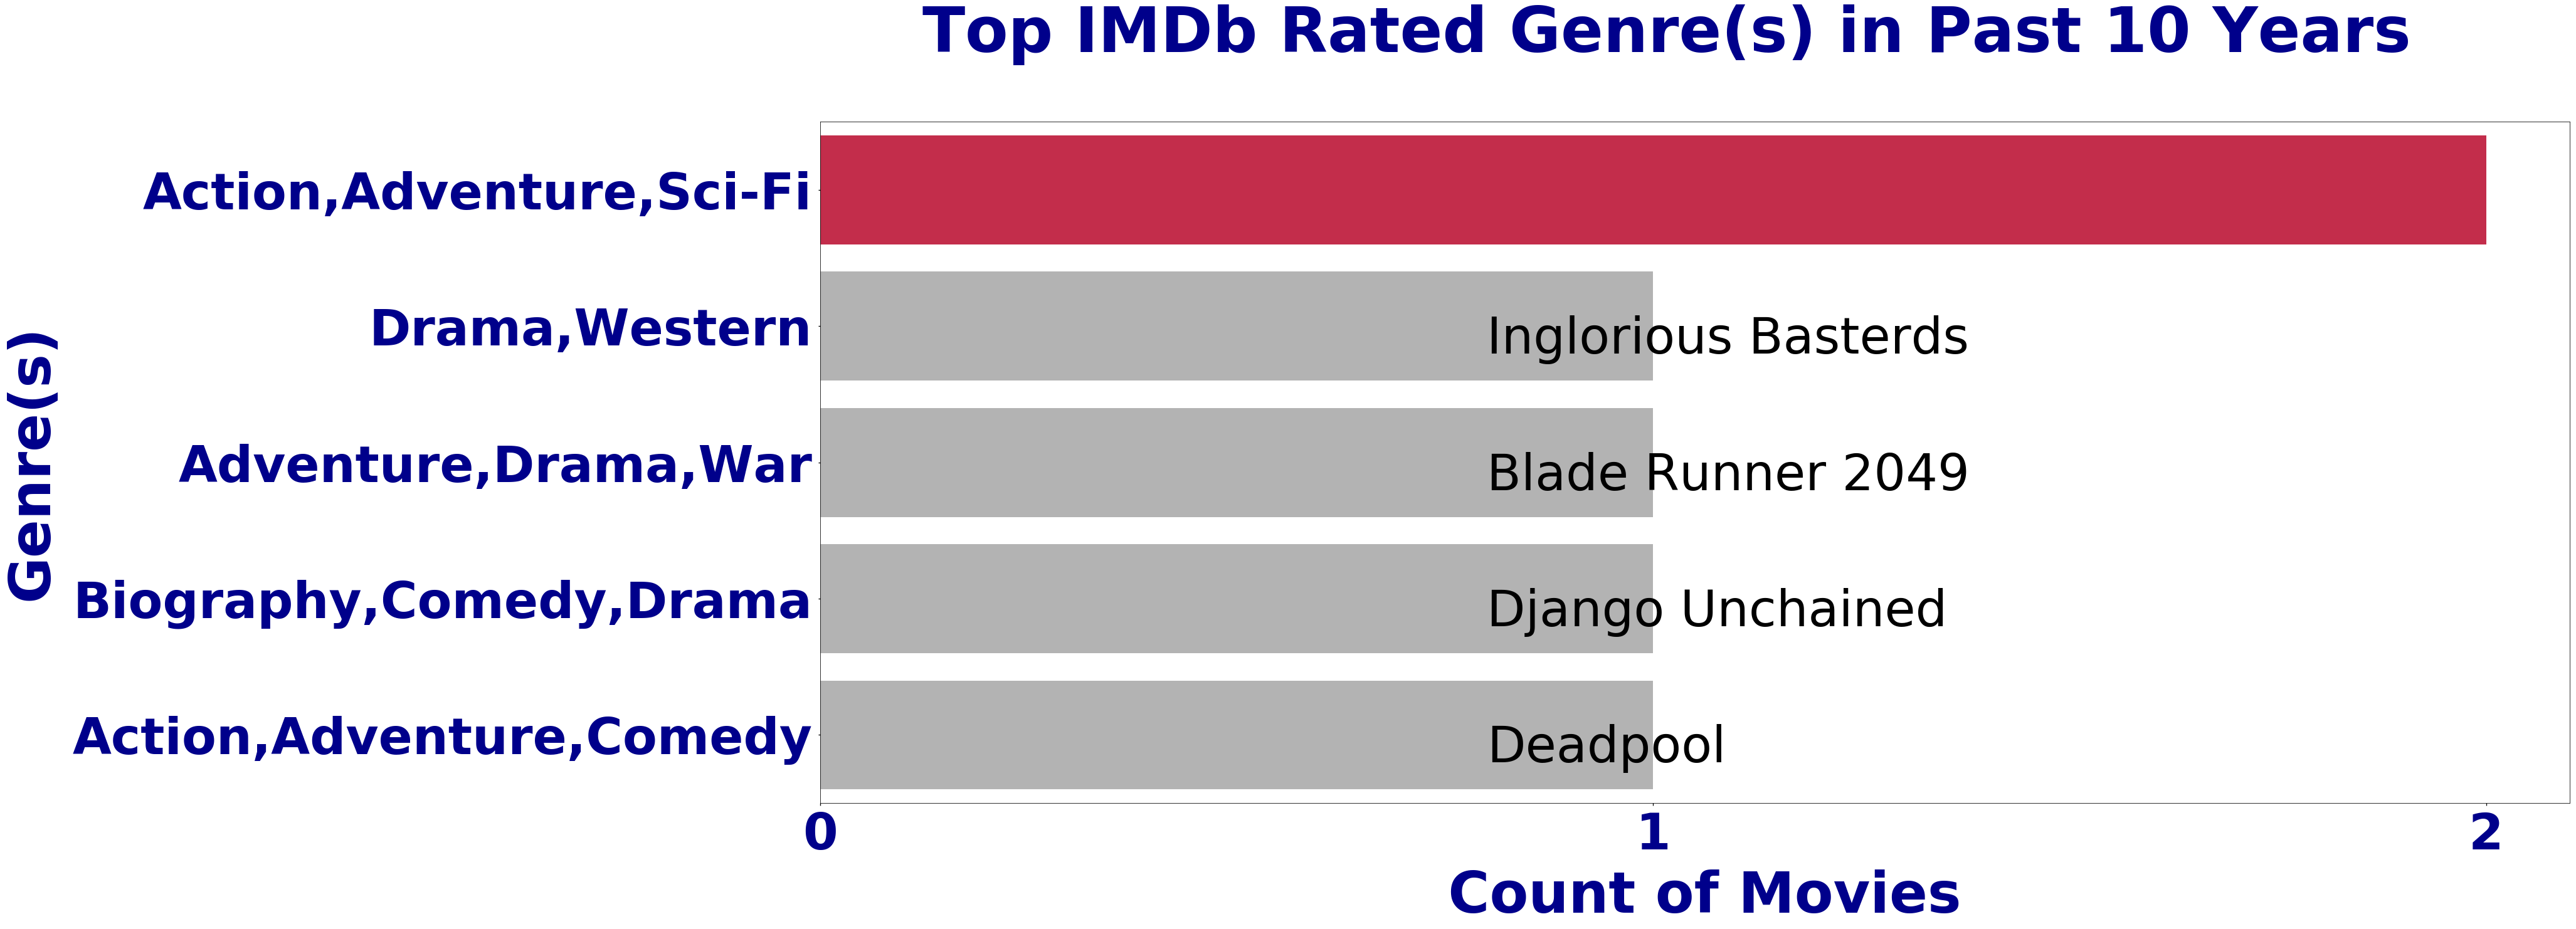

In [27]:
plt.figure(figsize=(50, 20))
xtick = [0,1,2]
sns.countplot(y='genre(s)', data=df_top_score, orient='h',
              order=df_top_score['genre(s)'].value_counts().iloc[:5].index,
              palette=['crimson','#B3B3B3','#B3B3B3', '#B3B3B3','#B3B3B3'])
plt.suptitle("Top IMDb Rated Genre(s) in Past 10 Years", y=1.01, fontsize=100, fontweight='bold', color="#00008B")
plt.xlabel(" Count of Movies", labelpad=15, fontsize=90, fontweight='bold', color="#00008B")
plt.ylabel("Genre(s)", labelpad=20, fontsize=90, fontweight='bold', color="#00008B")
plt.xticks(xtick, fontsize=80, fontweight='bold', color="#00008B")
plt.yticks(fontsize=80, fontweight='bold', color="#00008B")
plt.annotate('Inglorious Basterds',xy=(0,1), xytext=(.8,1.2), size=80)
plt.annotate('Blade Runner 2049',xy=(0,2), xytext=(.8,2.2), size=80)
plt.annotate('Django Unchained',xy=(0,3), xytext=(.8,3.2), size=80)
plt.annotate('Deadpool',xy=(0,4), xytext=(.8,4.2), size=80);

### It can be concluded that the genre(s) that earned the most in the past decade are the genre(s) that have the highest imdb score as well. <br> It is also interesting to note that, even though the genre(s) are almost the same for highest grossing and the top IMDb rated movies, the movies in itself are different. <br>Conclusion: IMDB ratings give the audiences' perceptions in terms of the genre(s) whereas the rotten tomatoes ratings can be used to view the critic's perception about a particular movie. 